In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent styles
sns.set_theme(style="whitegrid")  # Sets a uniform grid background
sns.set_palette("Set2")  # Sets a color scheme
plt.style.use("ggplot")  # Matplotlib consistent style

In [40]:
# Set font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

In [41]:
df = pd.read_csv("dataset.csv")

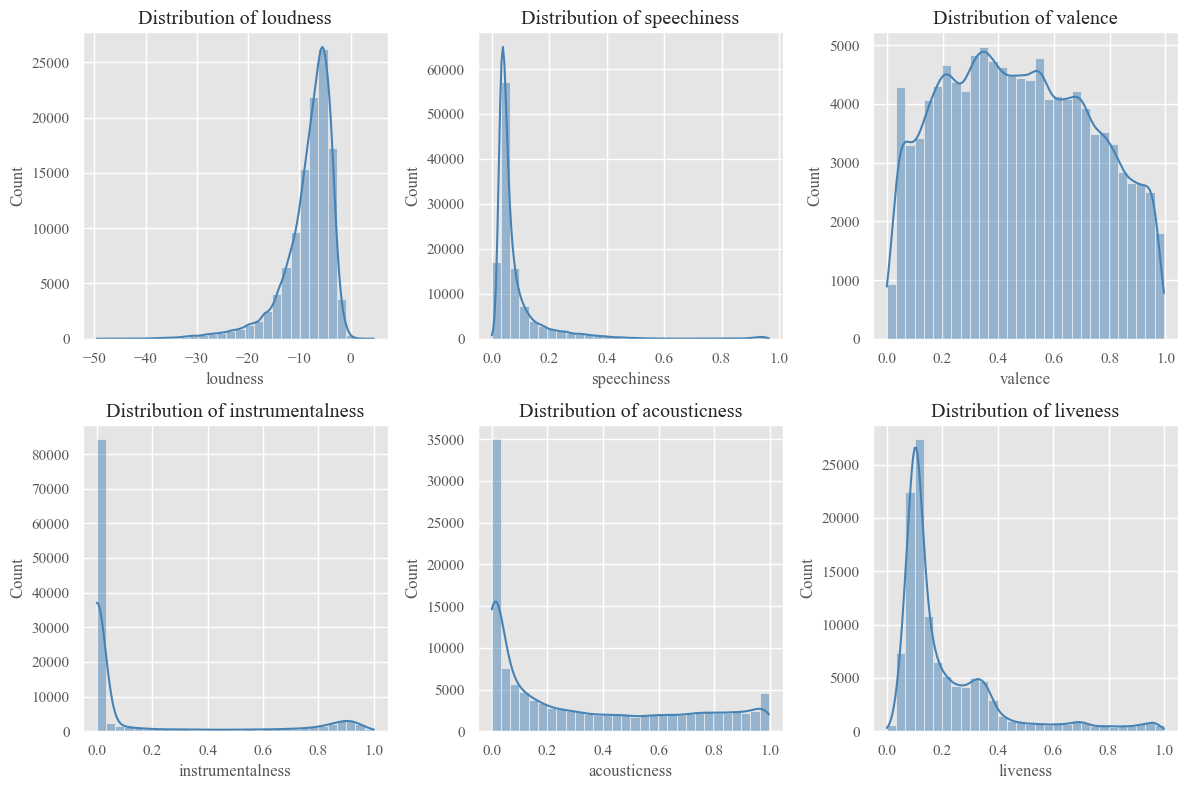

In [43]:
#1. Distribution of Music Attributes
features = ['loudness', 'speechiness', 'valence', 'instrumentalness', 'acousticness', 'liveness']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True,  color="steelblue")
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig("bijaya_music_attribute_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

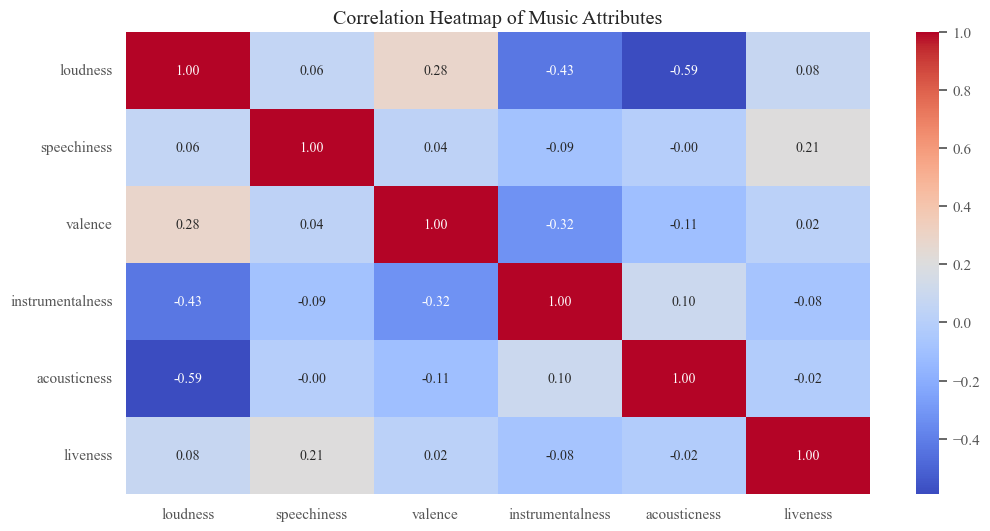

In [44]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 6))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Music Attributes")
plt.savefig("bijaya_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

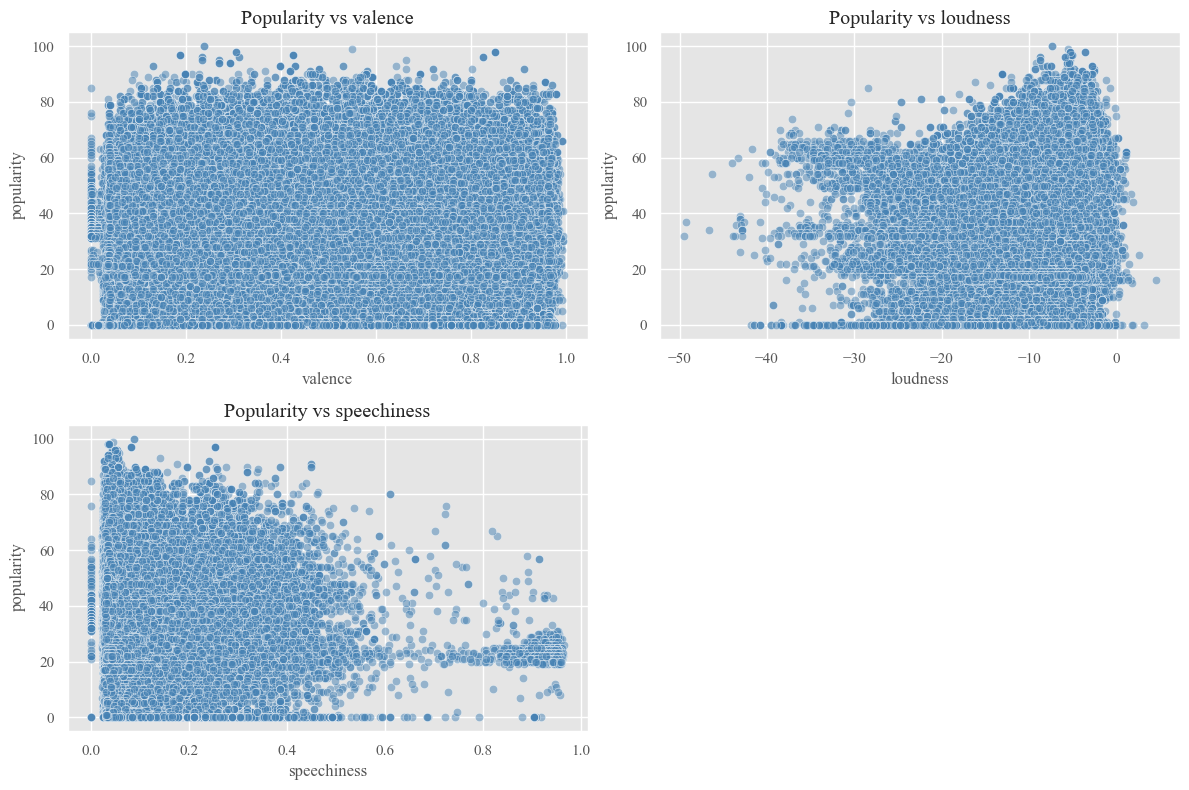

In [45]:
# 3. Popularity vs. Music Features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['valence', 'loudness', 'speechiness'], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['popularity'], alpha=0.5, color="steelblue")
    plt.title(f'Popularity vs {feature}')
plt.tight_layout()
plt.savefig("bijaya_popularity_with_music_features.png", dpi=300, bbox_inches="tight")
plt.show()

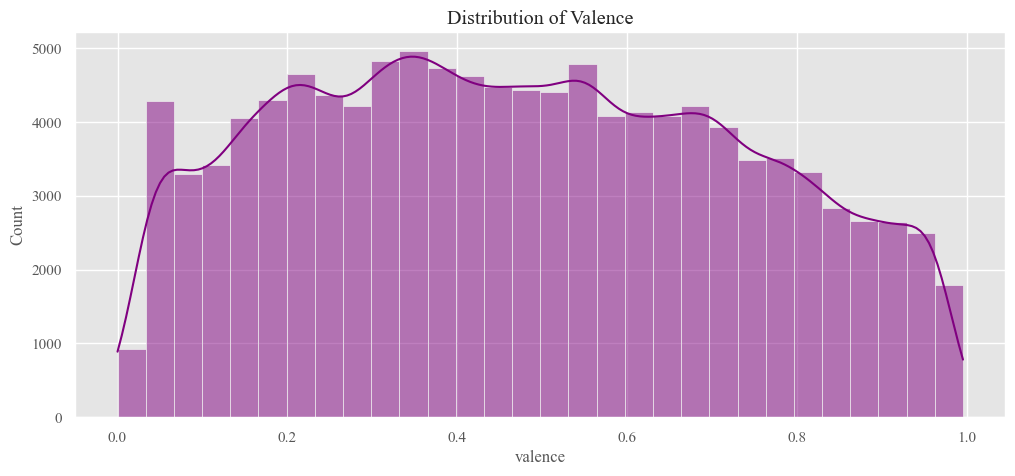

C:\Users\cnp\AppData\Local\Temp\ipykernel_8900\2069782086.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['key'], palette="coolwarm")


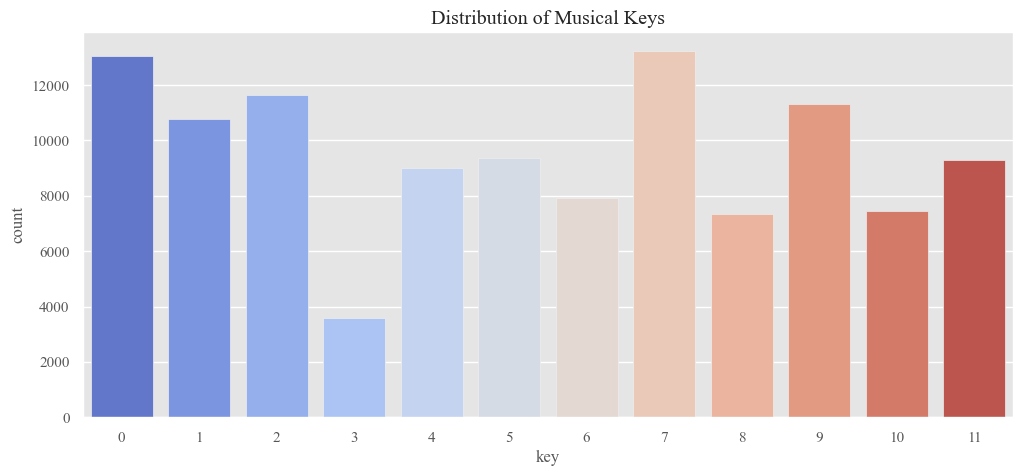

In [46]:
# 4. Valence and Key Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['valence'], bins=30, kde=True, color='purple')
plt.title("Distribution of Valence")
plt.savefig("bijaya_valence_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 5))
sns.countplot(x=df['key'], palette="coolwarm")
plt.title("Distribution of Musical Keys")
plt.savefig("bijaya_key_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


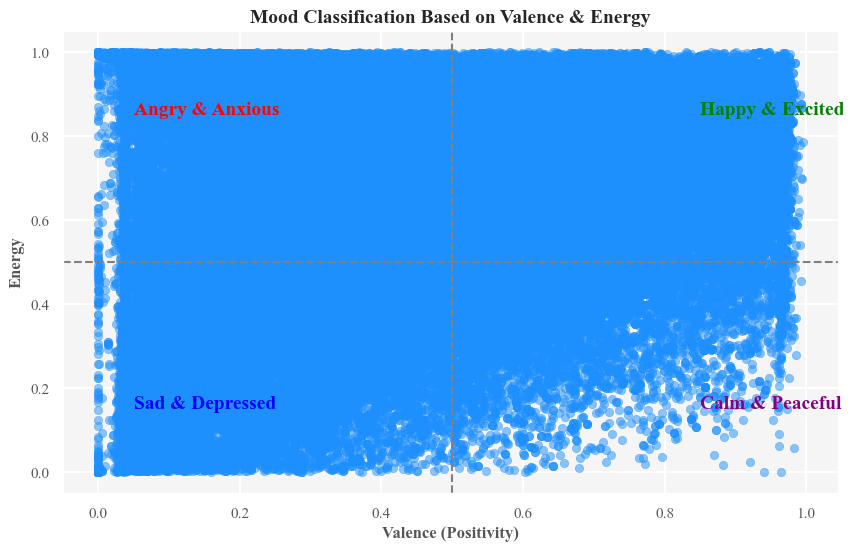

In [47]:
# 5. Valence vs. Energy Scatter Plot (Enhanced for Visual Appeal)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['valence'], y=df['energy'], alpha=0.5, edgecolor=None, color='dodgerblue')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=1.5)
plt.axvline(0.5, color='gray', linestyle='--', linewidth=1.5)

# Adding shaded background for better visibility
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color='white', linestyle='-', linewidth=1.5)

# Highlight text with better positioning and larger font
plt.text(0.85, 0.85, "Happy & Excited", fontsize=14, color='green', fontweight='bold')
plt.text(0.05, 0.85, "Angry & Anxious", fontsize=14, color='red', fontweight='bold')
plt.text(0.05, 0.15, "Sad & Depressed", fontsize=14, color='blue', fontweight='bold')
plt.text(0.85, 0.15, "Calm & Peaceful", fontsize=14, color='purple', fontweight='bold')

# Labels and Title
plt.xlabel("Valence (Positivity)", fontsize=12, fontweight='bold')
plt.ylabel("Energy", fontsize=12, fontweight='bold')
plt.title("Mood Classification Based on Valence & Energy", fontsize=14, fontweight='bold')
plt.savefig("bijaya_mood_classification_on_valence_and_energy.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 1400x700 with 0 Axes>

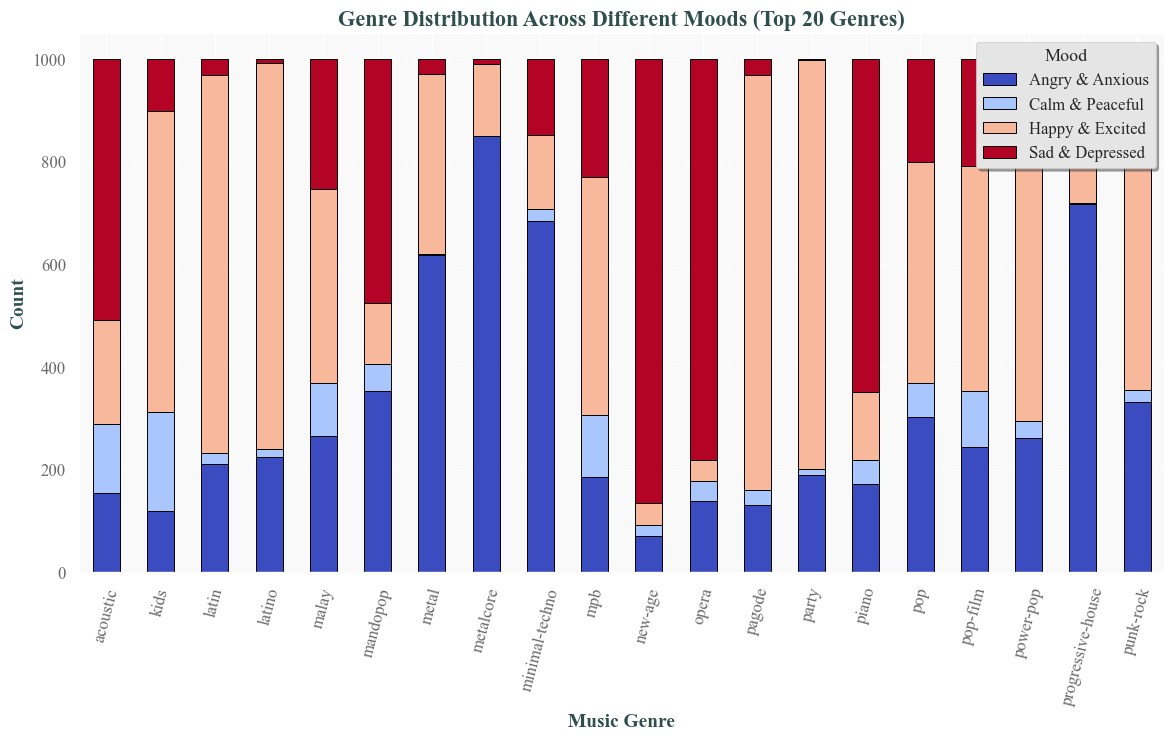

In [48]:
# 6. Emotion-Based Genre Distribution (Visually Enhanced Stacked Bar Chart for Top 20 Genres)
def categorize_mood(row):
    if row['valence'] >= 0.5 and row['energy'] >= 0.5:
        return 'Happy & Excited'
    elif row['valence'] >= 0.5 and row['energy'] < 0.5:
        return 'Calm & Peaceful'
    elif row['valence'] < 0.5 and row['energy'] >= 0.5:
        return 'Angry & Anxious'
    else:
        return 'Sad & Depressed'

df['mood'] = df.apply(categorize_mood, axis=1)

# Selecting top 20 genres based on frequency
top_20_genres = df['track_genre'].value_counts().nlargest(20).index
df_top_genres = df[df['track_genre'].isin(top_20_genres)]

plt.figure(figsize=(14, 7))
mood_genre_count = df_top_genres.groupby(['track_genre', 'mood']).size().unstack().fillna(0)
ax = mood_genre_count.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm', edgecolor='black', linewidth=0.7)

# Styling Enhancements
plt.title("Genre Distribution Across Different Moods (Top 20 Genres)", fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel("Music Genre", fontsize=14, fontweight='bold', color='darkslategray')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='darkslategray')
plt.xticks(rotation=75, fontsize=12, color='dimgray')
plt.yticks(fontsize=12, color='dimgray')
plt.legend(title="Mood", fontsize=12, title_fontsize=13, loc='upper right', frameon=True, shadow=True)

# Adding Grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f9f9f9')
plt.savefig("bijaya_mood_based_genre_distribution.png", dpi=300, bbox_inches="tight")
plt.show()